# Import the libraries

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import the dataset and representing some statistical information

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.shape

(150, 6)

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Data Visualization

In [9]:
data=data.drop('Id',axis=1)

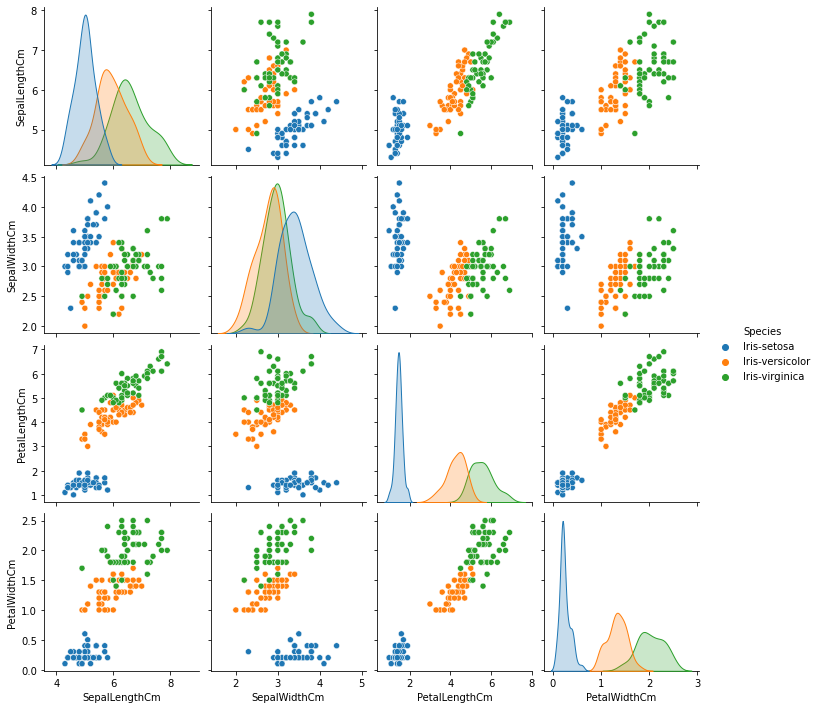

In [10]:
sns.pairplot(data,hue='Species')

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


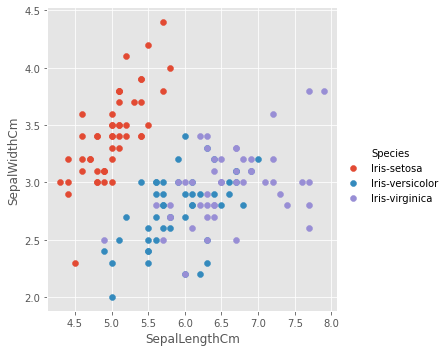

In [11]:
plt.style.use('ggplot')
sns.FacetGrid(data,hue='Species', size=5).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

# Model training

In [12]:
x=data.drop('Species',axis=1)
y=data['Species']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
model=DecisionTreeClassifier()

In [15]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(418.5, 498.3, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(354.11538461538464, 407.70000000000005, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(482.8846153846154, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(257.53846153846155, 317.1, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(128.76923076923077, 226.5, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(64.38461538461539, 135.89999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(193.15384615384616, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 135.89999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(386.3076923076923, 45.29

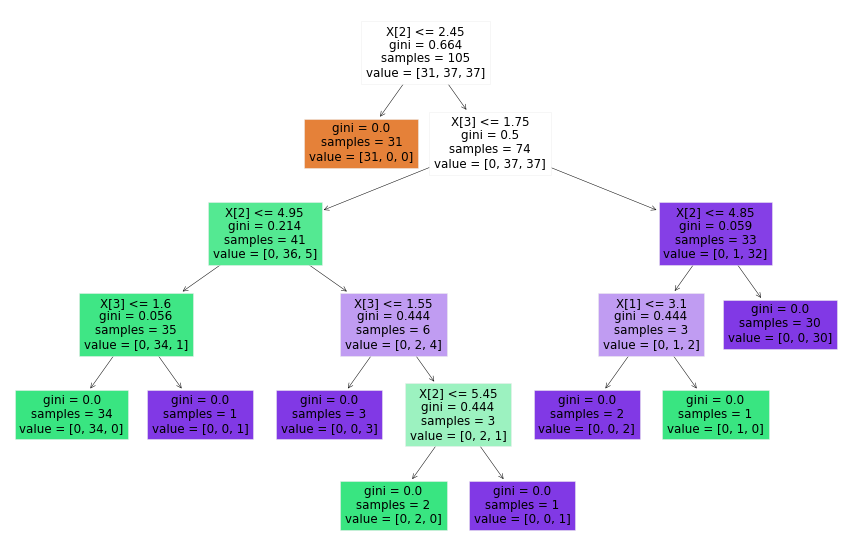

In [16]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

#  Checking the accuracy of the model

In [18]:
ypred=model.predict(x_test)
print("Accuracy score:",accuracy_score(ypred,y_test))
print(classification_report(ypred,y_test))
print(confusion_matrix(ypred,y_test))

Accuracy score: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
